In [1]:
!pip install shap
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from scipy import stats
import plotly.express as px
import math 
from sklearn.preprocessing import LabelEncoder
import shap

     |████████████████████████████████| 358kB 5.0MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491623 sha256=9f00a95208bc8093b566fd8c68dace50cea9b748eec5d6fad57a66dce08007e9
  Stored in directory: /root/.cache/pip/wheels/15/27/f5/a8ab9da52fd159aae6477b5ede6eaaec69fd130fa0fa59f283
Successfully built shap


In [2]:
pd.options.mode.chained_assignment = None  # default='warn'
pd.options.display.max_rows = 200
pd.options.display.max_columns = 150

In [3]:
#Reading the Dataset
new_data=pd.read_csv('/content/drive/MyDrive/Final Year project/loan-default-prediction/accepted_2007_to_2018Q4.csv',low_memory=False)

In [4]:
new_data.shape

(2260701, 151)

In [5]:
#Response/Target Variable 

new_data.loan_status.value_counts()

Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: loan_status, dtype: int64

In [7]:
#Considering only Fully Paid, Default, Charged Off Loans.
resp=['Current']
Loan_Main = new_data[~new_data['loan_status'].isin(resp)] 
Loan_Main["loan_status"] = np.where(Loan_Main["loan_status"].str.contains("Fully"), 0, 1)

#New Dataset shape
Loan_Main.shape

# Changing employee length to numerical.
Loan_Main['emp_length'].fillna("< 1 year",inplace= True)
dict_emp_length = {'10+ years':10, '6 years':6, '4 years':4, '< 1 year':0.5, '2 years':2,'9 years':9, '5 years':5, '3 years':3, '7 years':7, '1 year':1,'8 years':8}
Loan_Main['emp_length'].replace(dict_emp_length, inplace=True)

#Seperating Loan_Main dataset into two based on Application_Type (Individual / Joint Type)
grouped = Loan_Main.groupby(Loan_Main.application_type)
Individual_Loan=grouped.get_group("Individual")
Joint_Loan=grouped.get_group("Joint App")

In [8]:
Individual_Loan.shape, Joint_Loan.shape

((1352767, 151), (29584, 151))

In [9]:
# Changing purpose into numerical using labelencoder
col=['purpose']
enc= LabelEncoder()
Individual_Loan.loc[:,col]= Individual_Loan.loc[:,col].apply(enc.fit_transform)

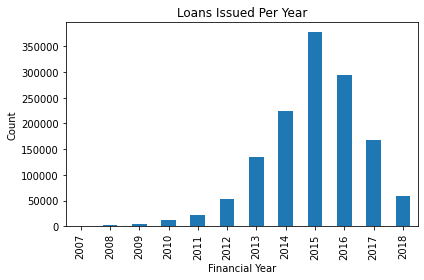

In [10]:
#Loan Issued over the years 

Individual_Loan['issue_d'] = pd.to_datetime(Individual_Loan['issue_d'])

Individual_Loan['issue_d'].dt.year.value_counts().sort_index().plot.bar()
plt.title('Loans Issued Per Year')
plt.xlabel('Financial Year')
plt.ylabel('Count')
plt.tight_layout()

plt.show()

In [11]:
#set fraction
frac = 0.85
#get fractions and make deep copy
df_train = Individual_Loan.loc[Individual_Loan['issue_d']  < Individual_Loan['issue_d'].quantile(frac)]
df_test =  Individual_Loan.loc[Individual_Loan['issue_d'] >= Individual_Loan['issue_d'].quantile(frac)]

In [12]:
#save as compressed zipped files to save space
df_test.to_csv('/content/drive/MyDrive/data/df_test.csv.zip')
df_train.to_csv('/content/drive/MyDrive/data/df_train.csv.zip')

In [13]:
df_train.shape,df_test.shape

((1143145, 151), (209622, 151))